# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | deputatskiy
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | karratha
Processing Record 11 of Set 1 | goma
Processing Record 12 of Set 1 | aguimes
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | khash
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | yerbogachen
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | sur
Processing Record 19 of Set 1 | ajdabiya
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | broome
Processing Record 22 of Set 1 | tura


In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,23.08,94,48,0.57,EC,1677582119
1,bluff,-46.6000,168.3333,15.39,85,75,2.46,NZ,1677582120
2,deputatskiy,69.3000,139.9000,-38.25,100,58,1.45,RU,1677582121
3,mataura,-46.1927,168.8643,13.23,85,86,0.80,NZ,1677582121
4,bredasdorp,-34.5322,20.0403,26.04,55,63,5.05,ZA,1677582121


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.08,94,48,0.57,EC,1677582119
1,bluff,-46.6000,168.3333,15.39,85,75,2.46,NZ,1677582120
2,deputatskiy,69.3000,139.9000,-38.25,100,58,1.45,RU,1677582121
3,mataura,-46.1927,168.8643,13.23,85,86,0.80,NZ,1677582121
4,bredasdorp,-34.5322,20.0403,26.04,55,63,5.05,ZA,1677582121


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

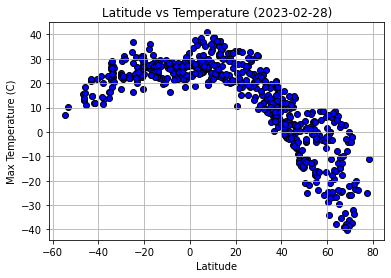

In [70]:
# Build scatter plot for latitude vs. temperature
x_axis_latvstemp = city_data_df["Lat"]
y_axis_latvstemp = city_data_df["Max Temp"]
plt.scatter(x_axis_latvstemp, y_axis_latvstemp, marker="o", color="b", edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (2023-02-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

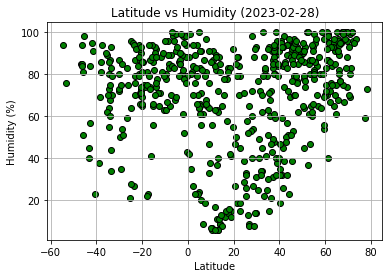

In [71]:
# Build the scatter plots for latitude vs. humidity
x_axis_latvshumi = city_data_df["Lat"]
y_axis_latvshumi = city_data_df["Humidity"]
plt.scatter(x_axis_latvshumi, y_axis_latvshumi, marker="o", color="g", edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (2023-02-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

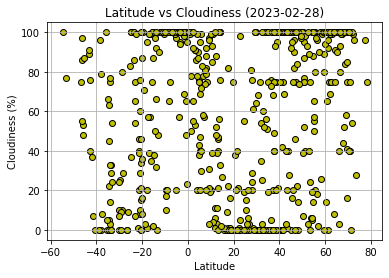

In [75]:
# Build the scatter plots for latitude vs. cloudiness
x_axis_latvscloud = city_data_df["Lat"]
y_axis_latvscloud = city_data_df["Cloudiness"]
plt.scatter(x_axis_latvscloud, y_axis_latvscloud, marker="o", color="y", edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (2023-02-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

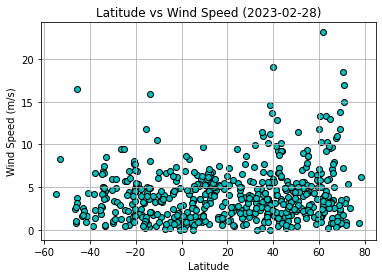

In [73]:
# Build the scatter plots for latitude vs. wind speed
x_axis_latvswind = city_data_df["Lat"]
y_axis_latvswind = city_data_df["Wind Speed"]
plt.scatter(x_axis_latvswind, y_axis_latvswind, marker="o", color="c", edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (2023-02-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def linearRegression(x_data, y_data, x_eq, y_eq):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regression = x_data * slope + intercept
    line_equation = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    print(f"The r-value is: {rvalue}")
    plt.scatter(x_data, y_data)
    plt.plot(x_data, regression,"r-")
    plt.annotate(line_equation, (x_eq, y_eq), fontsize=15 , color="red")
    plt.xlabel("Latitude")


In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,deputatskiy,69.3000,139.9000,-38.25,100,58,1.45,RU,1677582121
9,aguimes,27.9054,-15.4461,20.35,60,20,7.72,ES,1677582124
11,khash,28.2211,61.2158,20.31,27,61,3.90,IR,1677582125
13,yerbogachen,61.2767,108.0108,-20.78,99,92,1.79,RU,1677582126
15,sur,22.5667,59.5289,27.71,45,0,2.54,OM,1677582127


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.08,94,48,0.57,EC,1677582119
1,bluff,-46.6000,168.3333,15.39,85,75,2.46,NZ,1677582120
3,mataura,-46.1927,168.8643,13.23,85,86,0.80,NZ,1677582121
4,bredasdorp,-34.5322,20.0403,26.04,55,63,5.05,ZA,1677582121
5,castro,-24.7911,-50.0119,16.58,96,100,2.36,BR,1677582122


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8727560312887209


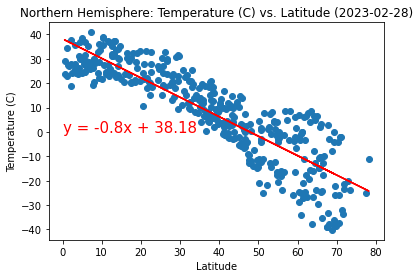

In [100]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]
x_eq = 0
y_eq = 0
plt.title(f"Northern Hemisphere: Temperature (C) vs. Latitude (2023-02-28)")
plt.ylabel("Temperature (C)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig5.png")
plt.show()

The r-value is: 0.5287301297459445


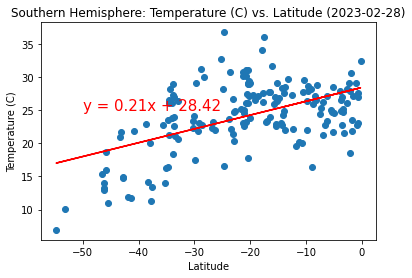

In [101]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]
x_eq = -50
y_eq = 25
plt.title(f"Southern Hemisphere: Temperature (C) vs. Latitude (2023-02-28)")
plt.ylabel("Temperature (C)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
Based on the linear regression models, we can conclude that there is a strong negative correlation between the temperature and latitude in the Northern Hemisphere (r-value of -0.87). The higher the latitude, the lower the temperature. 
However, in the regression model for the Southern Hemisphere, the correlation tends to be a weaker. The r-value suggests a low/moderate positive correlation between the temperature and latitude (r-value of 0.52).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4203215349612786


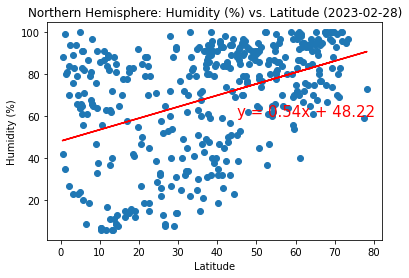

In [106]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]
x_eq = 45
y_eq = 60
plt.title(f"Northern Hemisphere: Humidity (%) vs. Latitude (2023-02-28)")
plt.ylabel("Humidity (%)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig7.png")
plt.show()

The r-value is: 0.20482559761501842


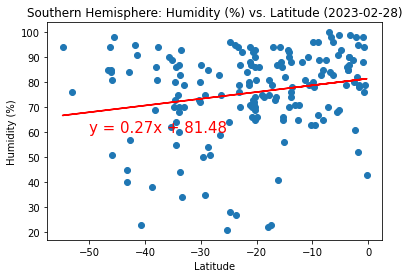

In [109]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"]
x_eq = -50
y_eq = 60
plt.title(f"Southern Hemisphere: Humidity (%) vs. Latitude (2023-02-28)")
plt.ylabel("Humidity (%)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** Based on the linear regression models, we can conclude that there is a low/medium correlation between the humidity and latitude for both the Northern and Southern Hemispheres with an r-value of 0.42 and 0.20, respectively. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27668395929488776


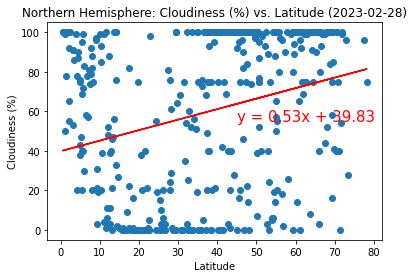

In [112]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]
x_eq = 45
y_eq = 55
plt.title(f"Northern Hemisphere: Cloudiness (%) vs. Latitude (2023-02-28)")
plt.ylabel("Cloudiness (%)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig9.png")
plt.show()

The r-value is: 0.3783566848398974


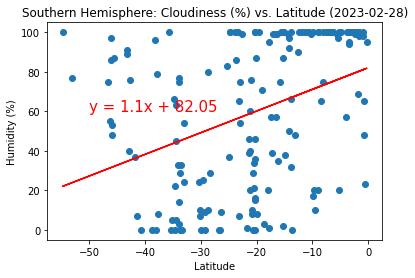

In [113]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]
x_eq = -50
y_eq = 60
plt.title(f"Southern Hemisphere: Cloudiness (%) vs. Latitude (2023-02-28)")
plt.ylabel("Humidity (%)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** Based on the linear regression models, we can conclude that there is a low/medium correlation between the cloudiness and latitude for both the Northern and Southern Hemispheres with an r-value of 0.27 and 0.37, respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15374743737396593


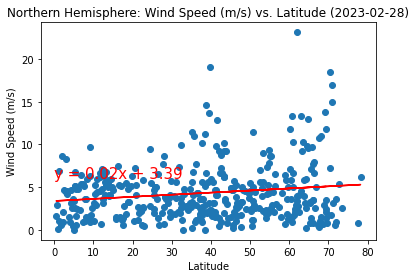

In [116]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]
x_eq = 0
y_eq = 6
plt.title(f"Northern Hemisphere: Wind Speed (m/s) vs. Latitude (2023-02-28)")
plt.ylabel("Wind Speed (m/s)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig11.png")
plt.show()

The r-value is: -0.11360030238230429


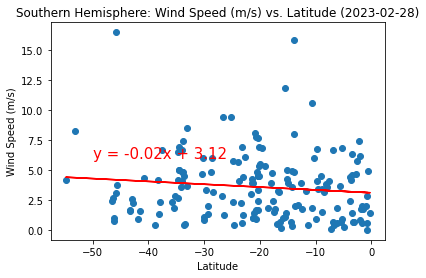

In [118]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]
x_eq = -50
y_eq = 6
plt.title(f"Southern Hemisphere: Wind Speed (m/s) vs. Latitude (2023-02-28)")
plt.ylabel("Wind Speed (m/s)")
linearRegression(x_data, y_data, x_eq, y_eq)

# Save the figure
plt.savefig("../output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** Based on the linear regression models, we can conclude that there is a very low correlation between the wind speed and latitude for both the Northern and Southern Hemispheres with an r-value of 0.15 and -0.11, respectively. 